In [0]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [0]:
!rm 'test.csv'
!rm 'train.csv'

rm: cannot remove 'test.csv': No such file or directory


In [0]:
from google.colab import files
uploaded = files.upload()

Saving testdata.csv to testdata (2).csv
Saving train.csv to train.csv


In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('testdata.csv')
combine = [train_df,test_df]
train_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
ID                      10 non-null int64
ComputerLanguage        10 non-null int64
UNIX                    9 non-null float64
calculus                10 non-null int64
physical                10 non-null int64
IntroductionComputer    10 non-null int64
All                     0 non-null float64
real                    0 non-null float64
Highcare                0 non-null float64
dtypes: float64(4), int64(5)
memory usage: 800.0 bytes


In [0]:
for x in ["ComputerLanguage","UNIX","calculus","physical","IntroductionComputer"]:
      train_df = train_df[train_df[x].notnull()]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 181
Data columns (total 9 columns):
ID                      171 non-null int64
ComputerLanguage        171 non-null float64
UNIX                    171 non-null float64
calculus                171 non-null float64
physical                171 non-null float64
IntroductionComputer    171 non-null float64
All                     171 non-null float64
real                    171 non-null float64
Highcare                171 non-null int64
dtypes: float64(7), int64(2)
memory usage: 13.4 KB


In [0]:
#train_df["calculus"]=train_df["calculus"].where(train_df["calculus"].notnull(),train_df["calculus"].mean())
#train_df["UNIX"]=train_df["UNIX"].where(train_df["UNIX"].notnull(),train_df["UNIX"].mean())
#train_df["physical"]=train_df["physical"].where(train_df["physical"].notnull(),train_df["physical"].mean())
#train_df["IntroductionComputer"]=train_df["IntroductionComputer"].where(train_df["IntroductionComputer"].notnull(),train_df["IntroductionComputer"].mean())
#train_df["ComputerLanguage"]=train_df["ComputerLanguage"].where(train_df["ComputerLanguage"].notnull(),train_df["ComputerLanguage"].mean())
#train_df.info()

In [0]:
test_df.describe()

,ID,ComputerLanguage,UNIX,calculus,physical,IntroductionComputer,All,real,Highcare
count,10.00000,10.000000,9.000000,10.000000,10.000000,10.000000,0.0,0.0,0.0
mean,5.50000,52.400000,70.555556,78.400000,67.200000,54.000000,NaN,NaN,NaN
std,3.02765,15.805765,17.008168,12.946042,10.809461,12.935739,NaN,NaN,NaN
min,1.00000,28.000000,49.000000,54.000000,49.000000,35.000000,NaN,NaN,NaN
25%,3.25000,39.500000,60.000000,71.750000,61.750000,45.000000,NaN,NaN,NaN
50%,5.50000,55.500000,69.000000,76.500000,67.000000,51.500000,NaN,NaN,NaN
75%,7.75000,62.500000,79.000000,87.000000,68.750000,63.750000,NaN,NaN,NaN
max,10.00000,78.000000,96.000000,99.000000,90.000000,74.000000,NaN,NaN,NaN


In [0]:
test_df["calculus"]=test_df["calculus"].where(test_df["calculus"].notnull(),test_df["calculus"].mean())
test_df["UNIX"]=test_df["UNIX"].where(test_df["UNIX"].notnull(),test_df["UNIX"].mean())
test_df["physical"]=test_df["physical"].where(test_df["physical"].notnull(),test_df["physical"].mean())
test_df["IntroductionComputer"]=test_df["IntroductionComputer"].where(test_df["IntroductionComputer"].notnull(),test_df["IntroductionComputer"].mean())
test_df["ComputerLanguage"]=test_df["ComputerLanguage"].where(test_df["ComputerLanguage"].notnull(),test_df["ComputerLanguage"].mean())

In [0]:
test_df

,ID,ComputerLanguage,UNIX,calculus,physical,IntroductionComputer,All,real,Highcare
0,1,28,60.000000,54,77,39,NaN,NaN,NaN
1,2,41,70.000000,70,60,64,NaN,NaN,NaN
2,3,67,79.000000,75,68,51,NaN,NaN,NaN
3,4,63,69.000000,71,49,51,NaN,NaN,NaN
4,5,78,94.000000,99,69,74,NaN,NaN,NaN
5,6,56,96.000000,89,90,68,NaN,NaN,NaN
6,7,39,49.000000,74,67,43,NaN,NaN,NaN
7,8,55,49.000000,81,61,35,NaN,NaN,NaN
8,9,61,69.000000,78,67,63,NaN,NaN,NaN
9,10,36,70.555556,93,64,52,NaN,NaN,NaN


In [0]:
train_df['ComputerLanguage']=train_df['ComputerLanguage'].astype(float)
train_df['ID']=train_df['ID'].astype(float)
train_df['Highcare']=train_df['Highcare'].astype(float)
test_df['ComputerLanguage']=test_df['ComputerLanguage'].astype(float)
train_df.head()

,ID,ComputerLanguage,UNIX,calculus,physical,IntroductionComputer,All,real,Highcare
0,1.0,95.0,95.0,89.0,89.0,92.0,24.5,24.5,0.0
2,3.0,52.0,60.0,83.0,78.0,42.0,23.5,17.5,0.0
3,4.0,75.0,77.0,95.0,79.0,60.0,23.5,23.5,0.0
4,5.0,72.0,87.0,73.0,66.0,60.0,21.5,21.5,0.0
5,6.0,37.0,13.0,91.0,69.0,47.0,20.5,14.5,0.0


In [0]:
#查看檔案資料

train_df.info()
print("--------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 181
Data columns (total 9 columns):
ID                      171 non-null float64
ComputerLanguage        171 non-null float64
UNIX                    171 non-null float64
calculus                171 non-null float64
physical                171 non-null float64
IntroductionComputer    171 non-null float64
All                     171 non-null float64
real                    171 non-null float64
Highcare                171 non-null float64
dtypes: float64(9)
memory usage: 13.4 KB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
ID                      10 non-null int64
ComputerLanguage        10 non-null float64
UNIX                    10 non-null float64
calculus                10 non-null int64
physical                10 non-null int64
IntroductionComputer    10 non-null int64
All                     0 non-null float64
real             

In [0]:
#將不會使用到的特徵刪除
train_df=train_df.drop(["All","real","ID"],axis=1)
test_df=test_df.drop(["All","real","Highcare"],axis=1)
combine = [train_df,test_df]

In [0]:
#新增特徵:IsChildren  
for dataset in combine:
    dataset["CL"]=9
    dataset.loc[(dataset["ComputerLanguage"] > 10),["CL"]] = 8
    dataset.loc[(dataset["ComputerLanguage"] > 20),["CL"]] = 7
    dataset.loc[(dataset["ComputerLanguage"] > 30),["CL"]] = 6
    dataset.loc[(dataset["ComputerLanguage"] > 40),["CL"]] = 5
    dataset.loc[(dataset["ComputerLanguage"] > 50),["CL"]] = 4
    dataset.loc[(dataset["ComputerLanguage"] > 60),["CL"]] = 3
    dataset.loc[(dataset["ComputerLanguage"] > 70),["CL"]] = 2
    dataset.loc[(dataset["ComputerLanguage"] > 80),["CL"]] = 1
    dataset.loc[(dataset["ComputerLanguage"] > 90),["CL"]] = 0
    dataset["U"]=9
    dataset.loc[dataset["UNIX"] > 10,"U"] = 8
    dataset.loc[dataset["UNIX"] > 20,"U"] = 7
    dataset.loc[dataset["UNIX"] > 30,"U"] = 6
    dataset.loc[dataset["UNIX"] > 40,"U"] = 5
    dataset.loc[dataset["UNIX"] > 50,"U"] = 4
    dataset.loc[dataset["UNIX"] > 60,"U"] = 3
    dataset.loc[dataset["UNIX"] > 70,"U"] = 2
    dataset.loc[dataset["UNIX"] > 80,"U"] = 1
    dataset.loc[dataset["UNIX"] > 90,"U"] = 0
    dataset["CAL"]=9
    dataset.loc[dataset["calculus"] > 10,"CAL"] = 8
    dataset.loc[dataset["calculus"] > 20,"CAL"] = 7
    dataset.loc[dataset["calculus"] > 30,"CAL"] = 6
    dataset.loc[dataset["calculus"] > 40,"CAL"] = 5
    dataset.loc[dataset["calculus"] > 50,"CAL"] = 4
    dataset.loc[dataset["calculus"] > 60,"CAL"] = 3
    dataset.loc[dataset["calculus"] > 70,"CAL"] = 2
    dataset.loc[dataset["calculus"] > 80,"CAL"] = 1
    dataset.loc[dataset["calculus"] > 90,"CAL"] = 0
    dataset["PHY"]=9
    dataset.loc[dataset["physical"] > 10,"PHY"] = 8
    dataset.loc[dataset["physical"] > 20,"PHY"] = 7
    dataset.loc[dataset["physical"] > 30,"PHY"] = 6
    dataset.loc[dataset["physical"] > 40,"PHY"] = 5
    dataset.loc[dataset["physical"] > 50,"PHY"] = 4
    dataset.loc[dataset["physical"] > 60,"PHY"] = 3
    dataset.loc[dataset["physical"] > 70,"PHY"] = 2
    dataset.loc[dataset["physical"] > 80,"PHY"] = 1
    dataset.loc[dataset["physical"] > 90,"PHY"] = 0
    dataset["IC"]=9
    dataset.loc[dataset["IntroductionComputer"] > 10,"IC"] = 8
    dataset.loc[dataset["IntroductionComputer"] > 20,"IC"] = 7
    dataset.loc[dataset["IntroductionComputer"] > 30,"IC"] = 6
    dataset.loc[dataset["IntroductionComputer"] > 40,"IC"] = 5
    dataset.loc[dataset["IntroductionComputer"] > 50,"IC"] = 4
    dataset.loc[dataset["IntroductionComputer"] > 60,"IC"] = 3
    dataset.loc[dataset["IntroductionComputer"] > 70,"IC"] = 2
    dataset.loc[dataset["IntroductionComputer"] > 80,"IC"] = 1
    dataset.loc[dataset["IntroductionComputer"] > 90,"IC"] = 0
train_df.head(69)

,ComputerLanguage,UNIX,calculus,physical,IntroductionComputer,Highcare,CL,U,CAL,PHY,IC
0,95.0,95.0,89.0,89.0,92.0,0.0,0,0,1,1,0
2,52.0,60.0,83.0,78.0,42.0,0.0,4,4,1,2,5
3,75.0,77.0,95.0,79.0,60.0,0.0,2,2,0,2,4
4,72.0,87.0,73.0,66.0,60.0,0.0,2,1,2,3,4
5,37.0,13.0,91.0,69.0,47.0,0.0,6,8,0,3,5
6,43.0,80.0,85.0,81.0,42.0,0.0,5,2,1,1,5
7,27.0,60.0,79.0,88.0,12.0,0.0,7,4,2,1,8
8,64.0,80.0,67.0,78.0,68.0,0.0,3,2,3,2,3
9,75.0,74.0,98.0,87.0,86.0,0.0,2,2,0,1,1
10,85.0,87.0,78.0,79.0,70.0,0.0,1,1,2,2,3


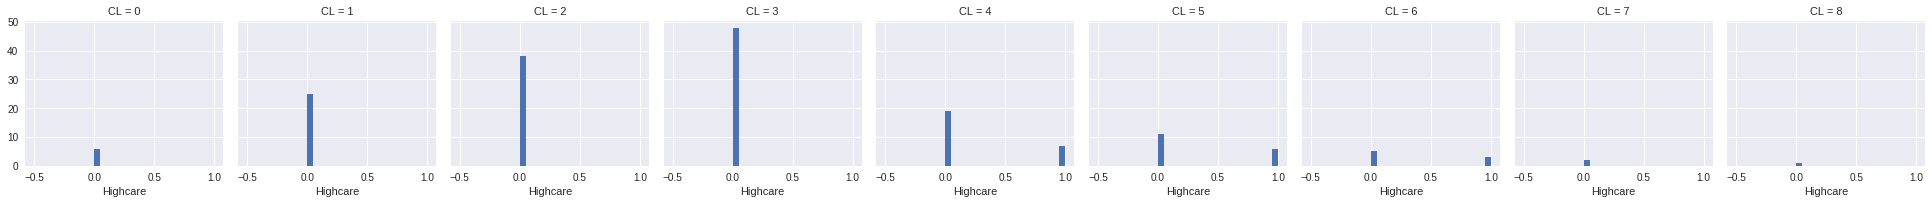

In [0]:
#bins=20 間隔20

g = sns.FacetGrid(train_df,col="CL")
g.map(plt.hist,"Highcare",bins=20)

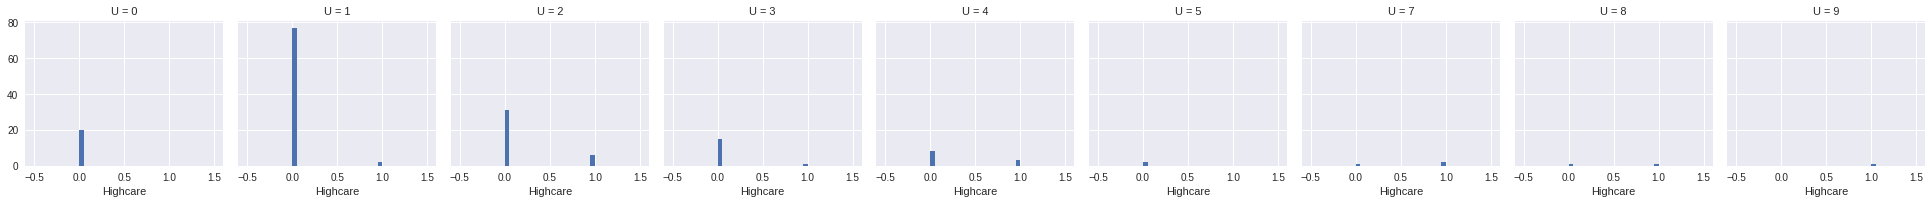

In [0]:
g = sns.FacetGrid(train_df,col="U")
g.map(plt.hist,"Highcare",bins=20)

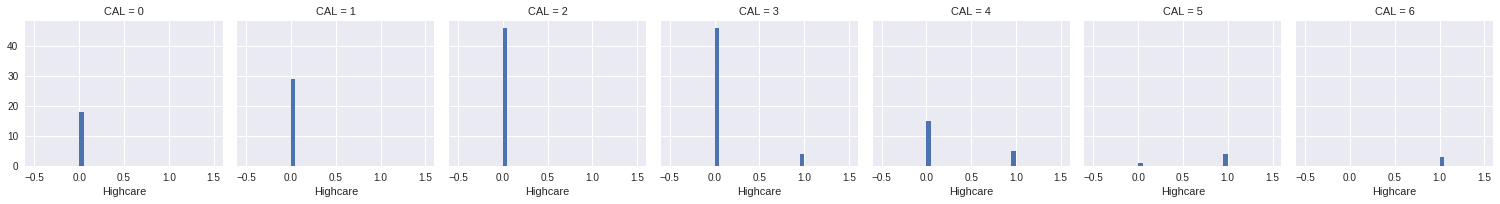

In [0]:
g = sns.FacetGrid(train_df,col="CAL")
g.map(plt.hist,"Highcare",bins=20)

,ComputerLanguage,UNIX,calculus,physical,IntroductionComputer,Highcare,CL,U,CAL,PHY,IC
0,95.0,95.0,89.0,89.0,92.0,0.0,0,0,1,1,0
2,52.0,60.0,83.0,78.0,42.0,0.0,4,4,1,2,5
3,75.0,77.0,95.0,79.0,60.0,0.0,2,2,0,2,4
4,72.0,87.0,73.0,66.0,60.0,0.0,2,1,2,3,4
5,37.0,13.0,91.0,69.0,47.0,0.0,6,8,0,3,5


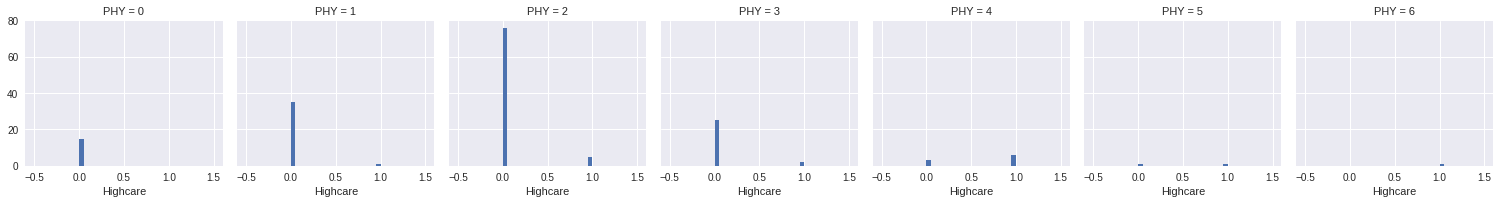

In [0]:
g = sns.FacetGrid(train_df,col="PHY")
g.map(plt.hist,"Highcare",bins=20)
train_df.head()

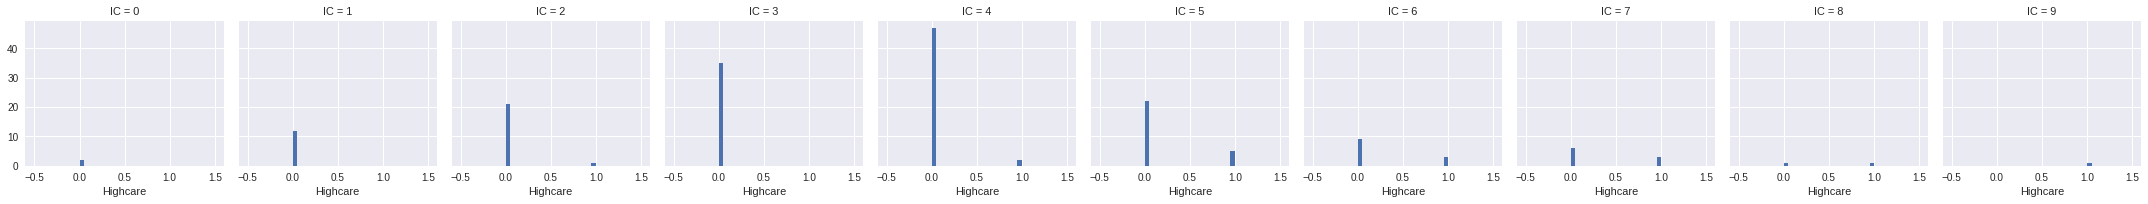

In [0]:

g = sns.FacetGrid(train_df,col="IC")
g.map(plt.hist,"Highcare",bins=20)

In [0]:
train_df=train_df.drop(["ComputerLanguage","UNIX","calculus","physical","IntroductionComputer"],axis=1)
test_df=test_df.drop(["ComputerLanguage","UNIX","calculus","physical","IntroductionComputer"],axis=1)
combine = [train_df,test_df]

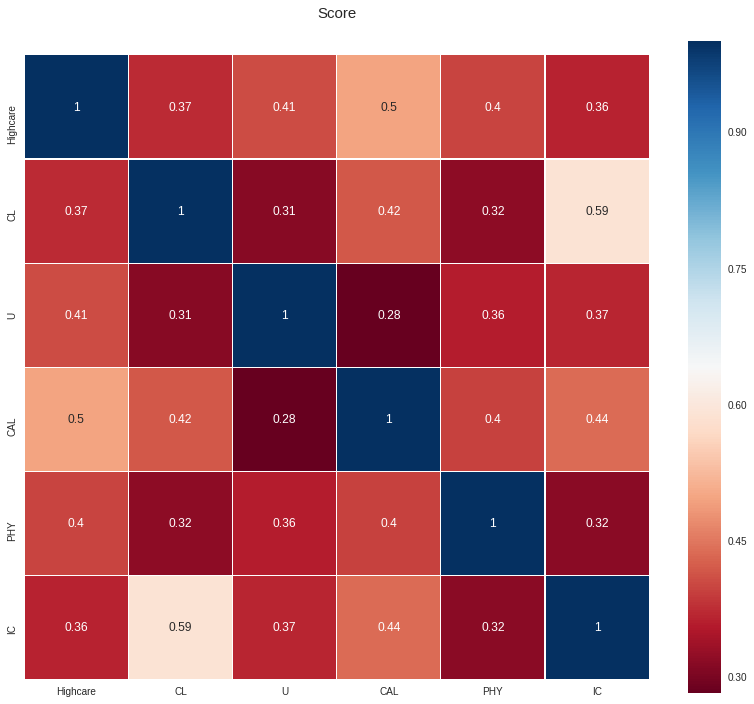

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Score', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
X_train = train_df.drop("Highcare",axis=1)
Y_train = train_df["Highcare"]
X_test = test_df.drop("ID",axis=1).copy()
X_test

,CL,U,CAL,PHY,IC
0,7,4,4,2,6
1,5,3,3,4,3
2,3,2,2,3,4
3,3,3,2,5,4
4,2,0,0,3,2
5,4,0,1,1,3
6,6,5,2,3,5
7,4,5,1,3,6
8,3,3,2,3,3
9,6,2,0,3,4


In [0]:
from sklearn.naive_bayes import GaussianNB
G=GaussianNB()
G.fit(X_train,Y_train)
Y_pred_g = G.predict(X_test)
acc_g = round(G.score(X_train,Y_train)*100,2)
acc_g

94.74

In [0]:
#生成檔案
import time

submission = pd.DataFrame({
        "ID": test_df["ID"],
        "Highcare": Y_pred_g
    })
submission.to_csv('GaussianNB'
                  +".csv", 
                  index=False)
files.download('GaussianNB.csv')